In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas_datareader as web
import datetime
from datetime import date



In [55]:
%matplotlib nbagg

In [56]:
start = datetime.datetime(2020,2,1)
end = datetime.datetime(2020,10,11)

In [57]:
bank_nifty = web.get_data_yahoo('ADANIGREEN.NS',start = datetime.datetime(2011, 1, 2), 
                             end = date.today())

In [58]:
bank_nifty.head(-1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-06-18,31.500000,28.500000,30.000000,31.500000,7006229.0,31.500000
2018-06-19,33.049999,31.000000,32.700001,32.599998,2895692.0,32.599998
2018-06-20,32.200001,31.000000,31.500000,31.000000,1115553.0,31.000000
2018-06-21,30.000000,29.450001,29.450001,29.650000,2854524.0,29.650000
2018-06-22,29.799999,28.200001,28.200001,29.450001,1612972.0,29.450001
...,...,...,...,...,...,...
2021-05-31,1285.949951,1242.250000,1260.000000,1268.199951,405540.0,1268.199951
2021-06-01,1280.000000,1249.000000,1270.000000,1271.050049,664012.0,1271.050049
2021-06-02,1318.449951,1275.000000,1275.000000,1299.800049,1381899.0,1299.800049


In [59]:
df=bank_nifty

In [60]:
ly=df.iloc[:360:-1]
ly

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-07,1294.400024,1263.000000,1294.400024,1264.849976,646885.0,1264.849976
2021-06-04,1308.000000,1271.250000,1305.199951,1277.250000,842516.0,1277.250000
2021-06-03,1323.000000,1281.099976,1323.000000,1286.900024,1190736.0,1286.900024
2021-06-02,1318.449951,1275.000000,1275.000000,1299.800049,1381899.0,1299.800049
2021-06-01,1280.000000,1249.000000,1270.000000,1271.050049,664012.0,1271.050049
...,...,...,...,...,...,...
2019-12-18,137.300003,134.000000,136.300003,135.100006,690735.0,135.100006
2019-12-17,137.000000,134.550003,135.000000,135.550003,957067.0,135.550003
2019-12-16,137.899994,132.699997,133.300003,134.399994,2156419.0,134.399994


# Marubuzo

In [61]:
fig = go.Figure()
fig.add_trace(go.Scatter(x= df.index, y= df.Close, name='Close'))
#fig.update_layout(title='Price of Bank Nifty over the Years', xaxis_title='Date', yaxis_title='Price')
fig.show()

In [62]:
fig = go.Figure([go.Candlestick(x= ly.index,open= ly['Open'], high=ly['High'],
                low=ly['Low'],
                close=ly['Close'])])


#fig.update_layout(title='Price of Bank Nifty over the Years', xaxis_title='Date', yaxis_title='Price')
fig.show()

In [63]:
#ly.loc[(ly.Open==ly.Low)]#ly.High<=1.2*ly.Close]

In [64]:
df2=(ly[(ly.High<=1.003*ly.Close) & (ly.Open==ly.Low)&(ly.Close>ly.Open)])
#np.where((df.high<=1.03close)&()))
df2

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-01,1160.050049,1104.900024,1104.900024,1160.050049,523216.0,1160.050049
2020-10-29,815.650024,755.000000,755.000000,815.650024,962440.0,815.650024
2020-09-24,617.650024,558.849976,558.849976,616.950012,2703433.0,616.950012
2020-07-02,357.950012,323.950012,323.950012,357.950012,3295000.0,357.950012


In [65]:
fig=go.Figure([go.Candlestick(x=df2.index,open= df2['Open'], high=df2['High'],
                low=df2['Low'],
                close=df2['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

# RSI
### RSI is a leading momentum indicator which helps in identifying a trend reversal. RSI indicator oscillates between 0 and 100 and based on the latest indicator reading, the expectations on the markets are set.The objective of using RSI is to help the trader identify oversold and overbought price areas. 


Here we have used 14 data points for the calculation, the default period setting in the charting software. This is also called the ‘look-back period’. If you are analyzing hourly charts, the default period is 14 hours, and if you are analyzing daily charts, the default period is 14 days.

In [66]:
df['diff']=df.Close.diff()
df

,High,Low,Open,Close,Volume,Adj Close,diff
Date,,,,,,,
2018-06-18,31.500000,28.500000,30.000000,31.500000,7006229.0,31.500000,NaN
2018-06-19,33.049999,31.000000,32.700001,32.599998,2895692.0,32.599998,1.099998
2018-06-20,32.200001,31.000000,31.500000,31.000000,1115553.0,31.000000,-1.599998
2018-06-21,30.000000,29.450001,29.450001,29.650000,2854524.0,29.650000,-1.350000
2018-06-22,29.799999,28.200001,28.200001,29.450001,1612972.0,29.450001,-0.199999
...,...,...,...,...,...,...,...
2021-06-01,1280.000000,1249.000000,1270.000000,1271.050049,664012.0,1271.050049,2.850098
2021-06-02,1318.449951,1275.000000,1275.000000,1299.800049,1381899.0,1299.800049,28.750000
2021-06-03,1323.000000,1281.099976,1323.000000,1286.900024,1190736.0,1286.900024,-12.900024


In [67]:
df['Gain']=df["diff"]>0
df

,High,Low,Open,Close,Volume,Adj Close,diff,Gain
Date,,,,,,,,
2018-06-18,31.500000,28.500000,30.000000,31.500000,7006229.0,31.500000,NaN,False
2018-06-19,33.049999,31.000000,32.700001,32.599998,2895692.0,32.599998,1.099998,True
2018-06-20,32.200001,31.000000,31.500000,31.000000,1115553.0,31.000000,-1.599998,False
2018-06-21,30.000000,29.450001,29.450001,29.650000,2854524.0,29.650000,-1.350000,False
2018-06-22,29.799999,28.200001,28.200001,29.450001,1612972.0,29.450001,-0.199999,False
...,...,...,...,...,...,...,...,...
2021-06-01,1280.000000,1249.000000,1270.000000,1271.050049,664012.0,1271.050049,2.850098,True
2021-06-02,1318.449951,1275.000000,1275.000000,1299.800049,1381899.0,1299.800049,28.750000,True
2021-06-03,1323.000000,1281.099976,1323.000000,1286.900024,1190736.0,1286.900024,-12.900024,False


In [68]:
df=df.drop('Gain',axis=1)

In [69]:
df['Points Gained']=np.where(df['diff']>0,df['diff'],0)
df['Points lost']=np.where(df['diff']<0,np.abs(df['diff']),0)
df

,High,Low,Open,Close,Volume,Adj Close,diff,Points Gained,Points lost
Date,,,,,,,,,
2018-06-18,31.500000,28.500000,30.000000,31.500000,7006229.0,31.500000,NaN,0.000000,0.000000
2018-06-19,33.049999,31.000000,32.700001,32.599998,2895692.0,32.599998,1.099998,1.099998,0.000000
2018-06-20,32.200001,31.000000,31.500000,31.000000,1115553.0,31.000000,-1.599998,0.000000,1.599998
2018-06-21,30.000000,29.450001,29.450001,29.650000,2854524.0,29.650000,-1.350000,0.000000,1.350000
2018-06-22,29.799999,28.200001,28.200001,29.450001,1612972.0,29.450001,-0.199999,0.000000,0.199999
...,...,...,...,...,...,...,...,...,...
2021-06-01,1280.000000,1249.000000,1270.000000,1271.050049,664012.0,1271.050049,2.850098,2.850098,0.000000
2021-06-02,1318.449951,1275.000000,1275.000000,1299.800049,1381899.0,1299.800049,28.750000,28.750000,0.000000
2021-06-03,1323.000000,1281.099976,1323.000000,1286.900024,1190736.0,1286.900024,-12.900024,0.000000,12.900024


In [80]:
df['rs']=df["Points Gained"].rolling(14).mean()/df["Points lost"].rolling(14).mean()


,High,Low,Open,Close,Volume,Adj Close,diff,Points Gained,Points lost,rs
Date,,,,,,,,,,
2018-06-18,31.500000,28.500000,30.000000,31.500000,7006229.0,31.500000,NaN,0.000000,0.000000,NaN
2018-06-19,33.049999,31.000000,32.700001,32.599998,2895692.0,32.599998,1.099998,1.099998,0.000000,NaN
2018-06-20,32.200001,31.000000,31.500000,31.000000,1115553.0,31.000000,-1.599998,0.000000,1.599998,NaN
2018-06-21,30.000000,29.450001,29.450001,29.650000,2854524.0,29.650000,-1.350000,0.000000,1.350000,NaN
2018-06-22,29.799999,28.200001,28.200001,29.450001,1612972.0,29.450001,-0.199999,0.000000,0.199999,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-06-01,1280.000000,1249.000000,1270.000000,1271.050049,664012.0,1271.050049,2.850098,2.850098,0.000000,2.269144
2021-06-02,1318.449951,1275.000000,1275.000000,1299.800049,1381899.0,1299.800049,28.750000,28.750000,0.000000,3.016129
2021-06-03,1323.000000,1281.099976,1323.000000,1286.900024,1190736.0,1286.900024,-12.900024,0.000000,12.900024,2.452520


In [81]:
ly=df.tail(360)
ly

,High,Low,Open,Close,Volume,Adj Close,diff,Points Gained,Points lost,rs
Date,,,,,,,,,,
2019-12-24,148.899994,145.100006,146.449997,148.899994,1169913.0,148.899994,7.049988,7.049988,0.000000,3.806892
2019-12-26,156.300003,156.250000,156.300003,156.300003,347718.0,156.300003,7.400009,7.400009,0.000000,4.634480
2019-12-27,164.100006,149.250000,159.399994,151.000000,5370150.0,151.000000,-5.300003,0.000000,5.300003,3.733329
2019-12-30,158.550003,152.449997,153.699997,158.550003,1567589.0,158.550003,7.550003,7.550003,0.000000,5.675852
2019-12-31,166.449997,161.100006,166.449997,166.449997,2050662.0,166.449997,7.899994,7.899994,0.000000,6.455160
...,...,...,...,...,...,...,...,...,...,...
2021-06-01,1280.000000,1249.000000,1270.000000,1271.050049,664012.0,1271.050049,2.850098,2.850098,0.000000,2.269144
2021-06-02,1318.449951,1275.000000,1275.000000,1299.800049,1381899.0,1299.800049,28.750000,28.750000,0.000000,3.016129
2021-06-03,1323.000000,1281.099976,1323.000000,1286.900024,1190736.0,1286.900024,-12.900024,0.000000,12.900024,2.452520


In [83]:
ly['Rsi']=100-(100/(1+rs))
ly

C:\Users\Gauri Deshmukh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,High,Low,Open,Close,Volume,Adj Close,diff,Points Gained,Points lost,rs,Rsi
Date,,,,,,,,,,,
2019-12-24,148.899994,145.100006,146.449997,148.899994,1169913.0,148.899994,7.049988,7.049988,0.000000,3.806892,79.196538
2019-12-26,156.300003,156.250000,156.300003,156.300003,347718.0,156.300003,7.400009,7.400009,0.000000,4.634480,82.252133
2019-12-27,164.100006,149.250000,159.399994,151.000000,5370150.0,151.000000,-5.300003,0.000000,5.300003,3.733329,78.873218
2019-12-30,158.550003,152.449997,153.699997,158.550003,1567589.0,158.550003,7.550003,7.550003,0.000000,5.675852,85.020640
2019-12-31,166.449997,161.100006,166.449997,166.449997,2050662.0,166.449997,7.899994,7.899994,0.000000,6.455160,86.586472
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-01,1280.000000,1249.000000,1270.000000,1271.050049,664012.0,1271.050049,2.850098,2.850098,0.000000,2.269144,69.410950
2021-06-02,1318.449951,1275.000000,1275.000000,1299.800049,1381899.0,1299.800049,28.750000,28.750000,0.000000,3.016129,75.100402
2021-06-03,1323.000000,1281.099976,1323.000000,1286.900024,1190736.0,1286.900024,-12.900024,0.000000,12.900024,2.452520,71.035646


<IPython.core.display.Javascript object>


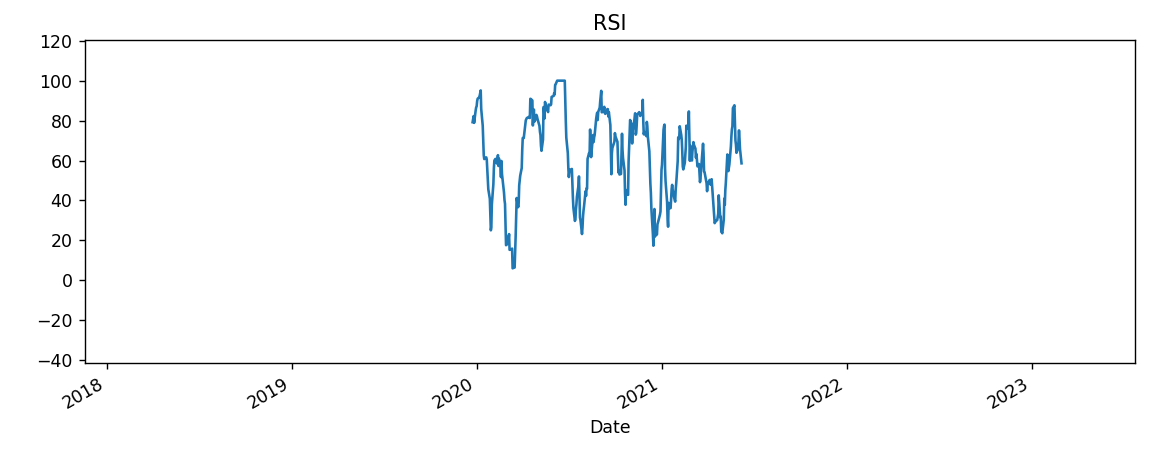

In [85]:
rsi=ly['Rsi'].plot(x=df.index,figsize=(7,4),title="RSI")
plt.tight_layout()
plt.show()

In [90]:
fig_rsi = go.Figure()
fig1=fig_rsi.add_trace(go.Scatter(x= ly.index, y= ly.Rsi, name='Relative strength Index'))
fig1

In [92]:
fig.add_trace(go.Scatter(x= ly.index, y= ly.Rsi, name='Relative strength Index'))